<a href="https://colab.research.google.com/github/josecal2844/03MIAR_10_2024-25_Algoritmos-de-Optimizacion/blob/main/Algoritmos_AG4_Jose_Calder%C3%B3n_Lorca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG4 - Actividad Guiada 4
Nombre: Jose Calderón Lorca
<br>

Link: https://colab.research.google.com/drive/1lV_Qy5HvmAXWVFU7l7pg45Oi2_fYGJFK#scrollTo=X-VlQjuJMWAT
<br>

Github: https://github.com/xxxxx/AlgoritmosOptimizacion
<br>

#Carga de librerias

In [2]:
#!pip install requests    #Hacer llamadas http a paginas de la red
#!pip install tsplib95    #Modulo para las instancias del problema del TSP

!pip install requests                     #Hacer llamadas http a paginas de la red
!pip install tabulate>=0.9 networkx>=3.0  # Actualiza las librerías 'tabulate' y 'networkx' a version compatibles con tsplib95
                                          # tabulate: Ayuda a crear tablas de texto legibles para presentar datos.
                                          # networkx:  Sirve para trabajar con grafos y redes, y realizar análisis sobre estas estructuras.
!pip install tsplib95 --no-deps           #Modulo para las instancias del problema del TSP

#Carga de los datos del problema

In [3]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios

#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)




In [4]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [5]:
Aristas
# https://github.com/ryanjoneil/tsplib/blob/master/elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



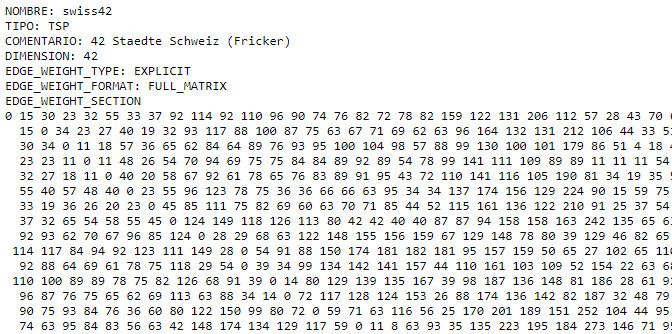

In [6]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funcionas basicas


In [7]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal   )
print(distancia_total(sol_temporal, problem))

[0, 40, 9, 15, 17, 3, 18, 27, 25, 5, 1, 8, 11, 29, 13, 33, 7, 24, 34, 28, 36, 22, 2, 21, 38, 37, 19, 30, 23, 26, 32, 35, 39, 6, 4, 31, 16, 10, 14, 20, 12, 41]
5034


#BUSQUEDA ALEATORIA

In [8]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 50000)

Mejor solución: [0, 38, 8, 34, 33, 3, 25, 12, 4, 7, 29, 40, 24, 28, 9, 20, 23, 41, 39, 21, 22, 19, 15, 5, 36, 17, 31, 35, 16, 32, 6, 37, 11, 13, 10, 27, 2, 1, 30, 26, 18, 14]
Distancia     : 3586


#BUSQUEDA LOCAL

In [9]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3586
Distancia Mejor Solucion Local: 3196


In [10]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(generador, solucion, problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = generador(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(genera_vecina, nueva_solucion, problem )

En la iteracion  28 , la mejor solución encontrada es: [0, 32, 34, 33, 20, 3, 27, 2, 28, 30, 29, 21, 24, 40, 9, 8, 41, 23, 39, 22, 38, 7, 15, 37, 36, 35, 31, 17, 16, 14, 19, 13, 18, 12, 11, 25, 10, 4, 26, 5, 6, 1]
Distancia     : 1665


#SIMULATED ANNEALING


In [11]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [45]:
def recocido_simulado(generador, problem, TEMPERATURA):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina = generador(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(genera_vecina_aleatorio, problem, 10000000)

La mejor solución encontrada es [0, 26, 18, 12, 11, 25, 23, 41, 10, 13, 19, 15, 36, 35, 9, 21, 40, 24, 39, 8, 2, 4, 6, 1, 32, 20, 33, 34, 27, 3, 37, 7, 31, 17, 16, 14, 5, 29, 22, 38, 30, 28]
con una distancia total de 2091


#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


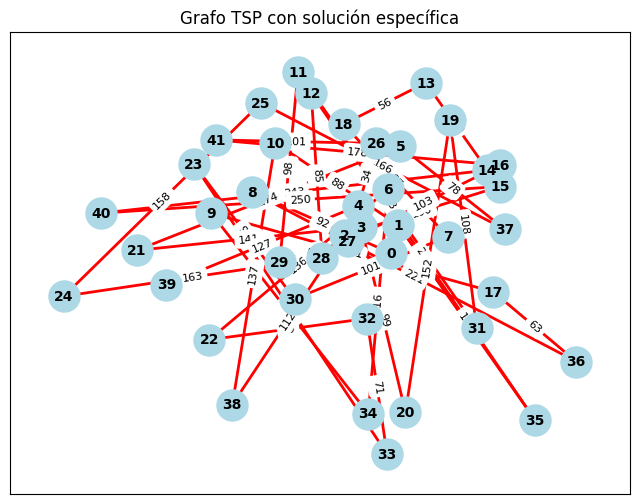

In [14]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

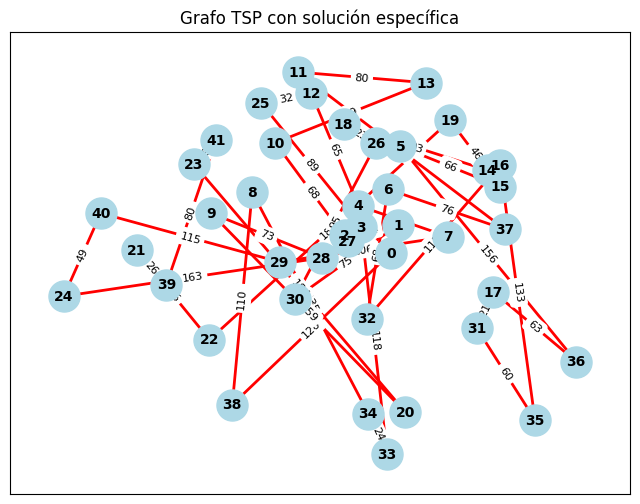

In [15]:
plot_tsp_solution(problem.edge_weights, solucion)

## EJERCICIOS EXTRAS

### Búsqueda local con Entornos variables. ¿Se puede mejorar con otros operadores de vecindad variables?

Para plantear este problema, probaremos con un modelo ligeramente diferente al propuesto en genera_vecina(). Se trata del operador 2-opt inversion [1], el cual invierte una de las sublistas, consiguiendo así un entorno de búsqueda más grande.

In [16]:
def genera_vecina_extra(solucion):
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1, len(solucion)-1):
    for j in range(i+1, len(solucion)):

      # Usamos el operador 2-OPT INVERSION
      vecina = solucion[:i] + solucion[i:j+1][::-1] + solucion[j+1:]

      distancia_vecina = distancia_total(vecina, problem)

      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion

In [19]:
# Partimos de la mejor solución encontrada por búsqueda aleatoria
sol = [0, 38, 8, 34, 33, 3, 25, 12, 4, 7, 29, 40, 24, 28, 9, 20, 23, 41, 39, 21, 22, 19, 15, 5, 36, 17, 31, 35, 16, 32, 6, 37, 11, 13, 10, 27, 2, 1, 30, 26, 18, 14]
print("Solución inicial: ", sol, "\n")
print("Solución con 2-OPT")
sol1 = busqueda_local(genera_vecina, sol, problem)
print("\n")
print("Solución con 2-OPT INVERSION")
sol2 = busqueda_local(genera_vecina_extra, sol, problem)

Solución inicial:  [0, 38, 8, 34, 33, 3, 25, 12, 4, 7, 29, 40, 24, 28, 9, 20, 23, 41, 39, 21, 22, 19, 15, 5, 36, 17, 31, 35, 16, 32, 6, 37, 11, 13, 10, 27, 2, 1, 30, 26, 18, 14] 

Solución con 2-OPT
En la iteracion  29 , la mejor solución encontrada es: [0, 32, 34, 33, 20, 3, 27, 2, 28, 30, 29, 21, 24, 40, 9, 8, 41, 23, 39, 22, 38, 7, 15, 37, 36, 35, 31, 17, 16, 14, 19, 13, 18, 12, 11, 25, 10, 4, 26, 5, 6, 1]
Distancia     : 1665


Solución con 2-OPT INVERSION
En la iteracion  34 , la mejor solución encontrada es: [0, 7, 1, 6, 5, 26, 18, 10, 25, 11, 12, 13, 19, 14, 16, 15, 37, 17, 31, 36, 35, 20, 33, 34, 38, 22, 39, 21, 24, 40, 23, 41, 9, 8, 29, 30, 28, 27, 2, 4, 3, 32]
Distancia     : 1375


In [20]:
# Partimos de la mejor solución encontrada en el paso anterior
sol = [0, 7, 1, 6, 5, 26, 18, 10, 25, 11, 12, 13, 19, 14, 16, 15, 37, 17, 31, 36, 35, 20, 33, 34, 38, 22, 39, 21, 24, 40, 23, 41, 9, 8, 29, 30, 28, 27, 2, 4, 3, 32]
print("Solución inicial: ", sol, "\n")
print("Solución con 2-OPT")
sol1 = busqueda_local(genera_vecina, sol, problem)
print("\n")
print("Solución con 2-OPT INVERSION")
sol2 = busqueda_local(genera_vecina_extra, sol, problem)

Solución inicial:  [0, 7, 1, 6, 5, 26, 18, 10, 25, 11, 12, 13, 19, 14, 16, 15, 37, 17, 31, 36, 35, 20, 33, 34, 38, 22, 39, 21, 24, 40, 23, 41, 9, 8, 29, 30, 28, 27, 2, 4, 3, 32] 

Solución con 2-OPT
En la iteracion  1 , la mejor solución encontrada es: []
Distancia     : 1375


Solución con 2-OPT INVERSION
En la iteracion  1 , la mejor solución encontrada es: []
Distancia     : 1375


Como podemos comprobar, la nueva función genera_vecina_extra(), donde se utiliza el operador 2-opt inversion, genera mejores soluciones que la función genera_vecina(). Sin embargo, podemos ver que al obtener una distancia de 1375 en la mejor solución encontrada hasta ahora, ninguna de las dos funciones es capaz de mejorar el resultado y ambas devuelven el mismo valor una y otra vez. Podemos explicar esto como consecuencia de alcanzar un mínimo local, que provoca que el algoritmo no pueda salir de ese punto.

### Recocido simulado ¿Se puede mejorar con otra elección no tan aleatoria( función genera_vecina_aleatorio()) ?

Para realizar esto, probamos con la búsqueda del nodo siguiente a un nodo elegido aleatoriamente.

In [65]:
def genera_vecina_simple(solucion):
  # Seleccionamos un nodo aleatorio 'i' y 'j' como el siguiente nodo
  i = random.randint(1, len(solucion) - 2)  # Elegir 'i' en el rango (1, len(solucion)-2)
  j = i + 1  # 'j' es el siguiente nodo después de 'i'

  # Devolvemos una nueva solución intercambiando los dos nodos 'i' y 'j'
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

In [70]:
print("Solución con genera_vecina_aleatoria")
sol1 = recocido_simulado(genera_vecina_aleatorio, problem, 10000000)
print("\n")
print("Solución con genera_vecina_simple")
sol2 = recocido_simulado(genera_vecina_simple, problem, 10000000)

Solución con genera_vecina_aleatoria
La mejor solución encontrada es [0, 35, 36, 17, 37, 31, 33, 20, 7, 15, 16, 14, 11, 25, 41, 9, 8, 30, 34, 32, 27, 28, 29, 38, 22, 39, 21, 24, 40, 23, 10, 12, 18, 26, 6, 1, 19, 13, 5, 4, 2, 3]
con una distancia total de 1847


Solución con genera_vecina_simple
La mejor solución encontrada es [0, 6, 20, 36, 19, 26, 18, 10, 9, 38, 30, 29, 27, 7, 23, 39, 33, 28, 12, 5, 1, 15, 17, 2, 21, 22, 37, 3, 24, 41, 13, 31, 35, 34, 40, 11, 16, 14, 32, 8, 25, 4]
con una distancia total de 3841


Como podemos ver, el algoritmo empeora bastante respecto a la búsqueda de dos nodo aleatorios.

### Mejorando el recocido simulado

Con la intención de mejorar los valores obtenidos hasta ahora, podemos diseñar una nueva función de recocido simulado.

In [38]:
import numpy as np

def nueva_recocido_sim(T, alpha, solucion, problem):
  for _ in range(100000):
      a, b = sorted(np.random.choice(len(solucion), 2, replace=False))
      nueva_solucion = solucion[:a] + solucion[a:b+1][::-1] + solucion[b+1:]

      d = distancia_total(solucion, problem)
      nueva_d = distancia_total(nueva_solucion, problem)
      delta = nueva_d - d

      if delta < 0 or np.exp(-delta / T) > np.random.rand():
          solucion, d = nueva_solucion, nueva_d
          #print(d)

      T *= alpha  # Reducimos la temperatura gradualmente
  return solucion, d

f = [0, 7, 1, 6, 5, 26, 18, 10, 25, 11, 12, 13, 19, 14, 16, 15, 37, 17, 31, 36, 35, 20, 33, 34, 38, 22, 39, 21, 24, 40, 23, 41, 9, 8, 29, 30, 28, 27, 2, 4, 3, 32]

T = 1001  # Temperatura inicial
alpha = 0.999  # Factor de enfriamiento
sol = nueva_recocido_sim(T, alpha, f, problem)

print("Distancia Solucion Incial:" , distancia_total(solucion, problem))

nueva_distancia = sol[1]
print("Distancia Mejor Solucion Local:", nueva_distancia)
print("Mejor solución: ", sol[0])

Distancia Solucion Incial: 3586
Distancia Mejor Solucion Local: 1291
Mejor solución:  [2, 27, 3, 4, 6, 1, 0, 32, 34, 33, 20, 31, 35, 36, 17, 7, 37, 15, 16, 14, 19, 13, 5, 26, 18, 12, 11, 25, 10, 8, 41, 23, 9, 21, 40, 24, 39, 22, 38, 30, 29, 28]


Como podemos ver, los resultados son muy buenos, consiguiendo reducir la distancia inicial hasta un valor muy cercano al ideal. De hecho, realizando algunas otras pruebas con el código se ha conseguido llegar a dos soluciones que tienen una distancia de 1273, igualando la mejor distancia encontrada para este problema (con los datos de distancias de problem).

Las soluciones encontradas con distancia de 1273 son:

sol1 = [20, 33, 34, 32, 0, 1, 6, 4, 3, 2, 27, 28, 29, 30, 38, 22, 39, 21, 24, 40, 23, 41, 9, 8, 10, 25, 11, 12, 18, 26, 5, 13, 19, 14, 16, 15, 37, 7, 17, 31, 36, 35]

sol2 = [35, 20, 33, 34, 32, 0, 1, 6, 4, 3, 27, 2, 28, 29, 30, 38, 22, 39, 21, 24, 40, 23, 41, 9, 8, 10, 25, 11, 12, 18, 26, 5, 13, 19, 14, 16, 15, 37, 7, 17, 31, 36]

## Referencias

[1] Hosseinnejad, R., Habibizad Navin, A., Rasouli Heikalabad, S., & Derakhshanfard, N. Combining 2-Opt and Inversion Neighborhood Searches with Discrete Gorilla Troops Optimization for the Traveling Salesman Problem. Saeed and Derakhshanfard, Nahideh, Combining.